# 🚢 Titanic Survival Prediction - Classification Model
In this project, I use the classic Titanic dataset to build a classification model that predicts whether a passenger survived or not based on features like age, sex, ticket class, and more.

This is part of my Coding Samurai Data Science Internship - Project 3.

## 📥 Importing Libraries and Loading the Dataset
We'll load the Titanic dataset from Kaggle and start exploring the structure.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Data Overview
Let's check the structure of the dataset, missing values, and data types.

In [70]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🔍 Exploratory Data Analysis
Let’s explore survival rates based on different features to understand important patterns.

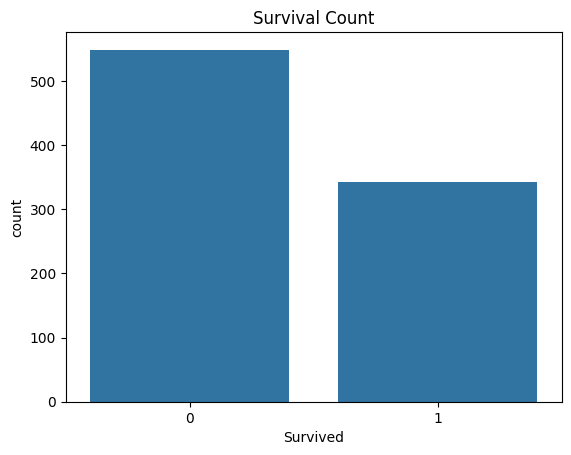

In [71]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

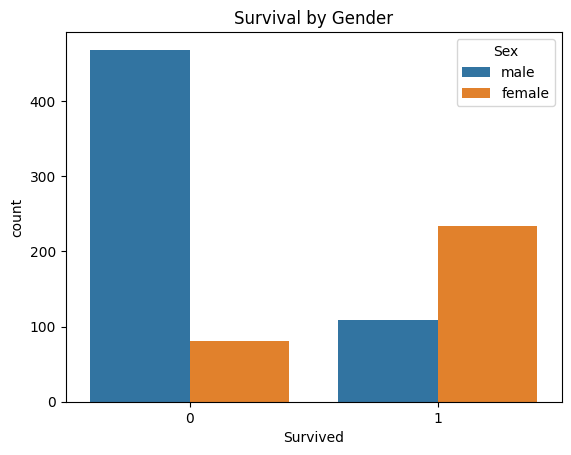

In [72]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

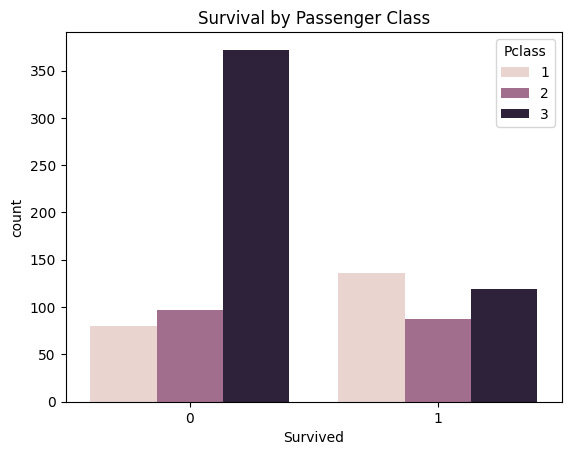

In [73]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

## 📈 Age and Fare Distributions
We’ll visualize continuous features to understand their spread and potential impact on survival.

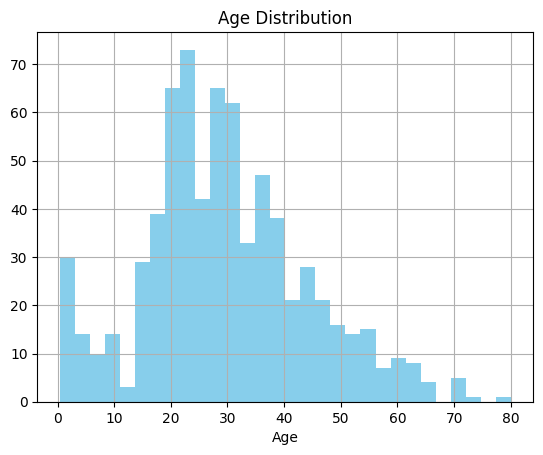

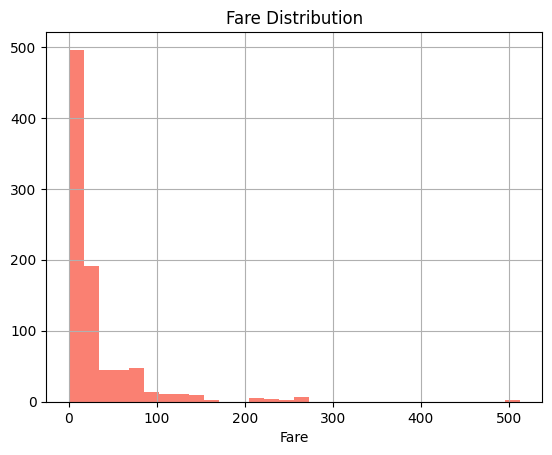

In [74]:
df['Age'].hist(bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

df['Fare'].hist(bins=30, color='salmon')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

## 🧼 Data Cleaning - Handling Missing Values
We noticed missing values in `Age`, `Cabin`, and `Embarked`. Let's fix that:
- Drop `Cabin` (too sparse)
- Fill `Age` with median
- Fill `Embarked` with mode

In [75]:
df.drop('Cabin', axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Ridhwan Salim\AppData\Local\Temp\ipykernel_16016\1758177899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Ridhwan Salim\AppData\Local\Temp\ipykernel_16016\1758177899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

## 🔡 Encoding Categorical Variables
We need to convert `Sex` and `Embarked` to numerical format for model input.

In [76]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

## 🧹 Dropping Irrelevant Columns
Features like `PassengerId`, `Name`, and `Ticket` don’t contribute much to the prediction.

In [77]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## 🧪 Train-Test Split
We’ll now split the dataset into features (X) and target (y), then train-test split.

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Model Training - Logistic Regression
We’ll train a logistic regression model to classify whether a passenger survived the Titanic disaster.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 📊 Model Evaluation
We’ll evaluate the model using accuracy, confusion matrix, and classification report.

In [80]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 0.81
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## 🔍 Confusion Matrix Visualization
A heatmap of the confusion matrix helps visually understand model performance.

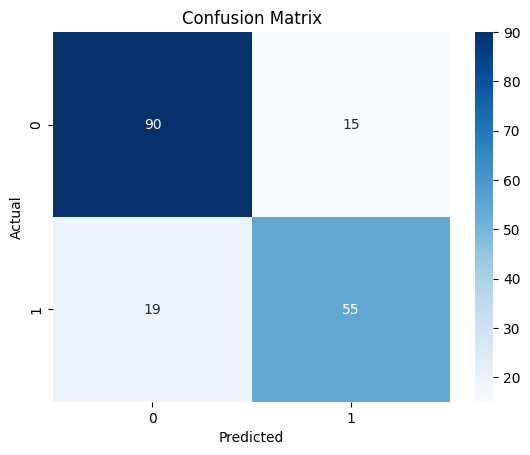

In [81]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Project 3: Logistic Regression on Titanic Dataset

This project applies logistic regression to predict passenger survival on the Titanic dataset using features like age, sex, and class.

- Source: [Kaggle Titanic: Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)
- Features used: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
- Target: Survived (0 = No, 1 = Yes)

1. Data Cleaning: Handled missing values in Age and Embarked.
2. Feature Engineering: Converted categorical variables into numeric.
3. Model: Logistic Regression using Scikit-learn.
4. Evaluation: Accuracy, Confusion Matrix, Precision, Recall, F1-Score.

- **Accuracy**: 0.81
- **Confusion Matrix**:
    ```
    [[90 15]
     [19 55]]
    ```
- **Classification Report**:
    ```
                  precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
    macro avg       0.81      0.80      0.80       179
    weighted avg    0.81      0.81      0.81       179
    ```

![Confusion Matrix](image.png)

- Logistic Regression is highly interpretable and efficient for binary classification.
- The model performed well on this dataset with an accuracy of 81%.
- Feature selection and handling missing values played a key role in boosting performance.

- Try hyperparameter tuning or ensemble methods.
- Add more features or engineer interactions between variables.
- Handle class imbalance more effectively if needed.